In [1]:
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import numpy as np


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.3,
                                                  random_state = 777)

y_train = np.squeeze(y_train)
y_val = np.squeeze(y_val)

170508288/170498071 [==============================] - 3s 0us/step


## 이미지 제네레이터를 사용하여 모델 학습하기

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  horizontal_flip = True,
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest')

# 검증 데이터셋에는 변환을 사용하지 않음
val_datagen = ImageDataGenerator(rescale = 1./255)

batch_size = 32

train_generator = train_datagen.flow(x_train, y_train,
                                     batch_size = batch_size)
val_generator = val_datagen.flow(x_val, y_val,
                                     batch_size = batch_size)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2,l1,l1_l2

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu')) # 규제함수 추가
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))


model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu')) 
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))


model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Dropout(0.2)) # 드롭아웃 추가
model.add(Flatten())
model.add(Dense(256, activation = 'relu')) 
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = Adam(1e-4),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
def get_step(train_len, batch_size):
  if(train_len % batch_size > 0):
    return train_len // batch_size + 1
  else:
    return train_len // batch_size
history = model.fit(train_generator,
                    epochs = 100,
                    steps_per_epoch = get_step(len(x_train), batch_size),
                    validation_data = val_generator,
                    validation_steps = get_step(len(x_val), batch_size))

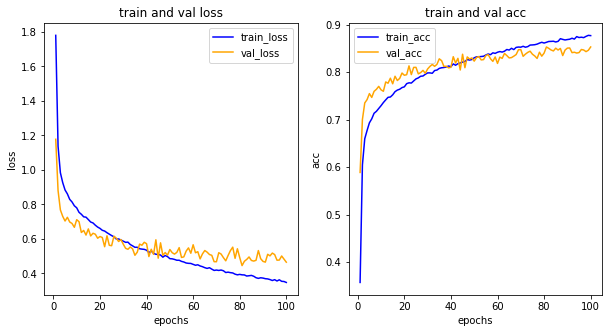

In [8]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10,5))
# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss , color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

In [9]:
import tensorflow as tf

get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]
print('층이름 :' , get_layer_name)
print('출력층이름 :' , get_output)

층이름 : ['conv2d', 'conv2d_1', 'max_pooling2d', 'conv2d_2', 'conv2d_3', 'max_pooling2d_1', 'conv2d_4', 'conv2d_5', 'max_pooling2d_2', 'dropout', 'flatten', 'dense', 'dense_1']
출력층이름 : [<KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'conv2d')>, <KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'conv2d_1')>, <KerasTensor: shape=(None, 16, 16, 32) dtype=float32 (created by layer 'max_pooling2d')>, <KerasTensor: shape=(None, 16, 16, 64) dtype=float32 (created by layer 'conv2d_2')>, <KerasTensor: shape=(None, 16, 16, 64) dtype=float32 (created by layer 'conv2d_3')>, <KerasTensor: shape=(None, 8, 8, 64) dtype=float32 (created by layer 'max_pooling2d_1')>, <KerasTensor: shape=(None, 8, 8, 128) dtype=float32 (created by layer 'conv2d_4')>, <KerasTensor: shape=(None, 8, 8, 128) dtype=float32 (created by layer 'conv2d_5')>, <KerasTensor: shape=(None, 4, 4, 128) dtype=float32 (created by layer 'max_pooling2d_2')>, <KerasTensor: shape=(None, 4, 4, 128) dt

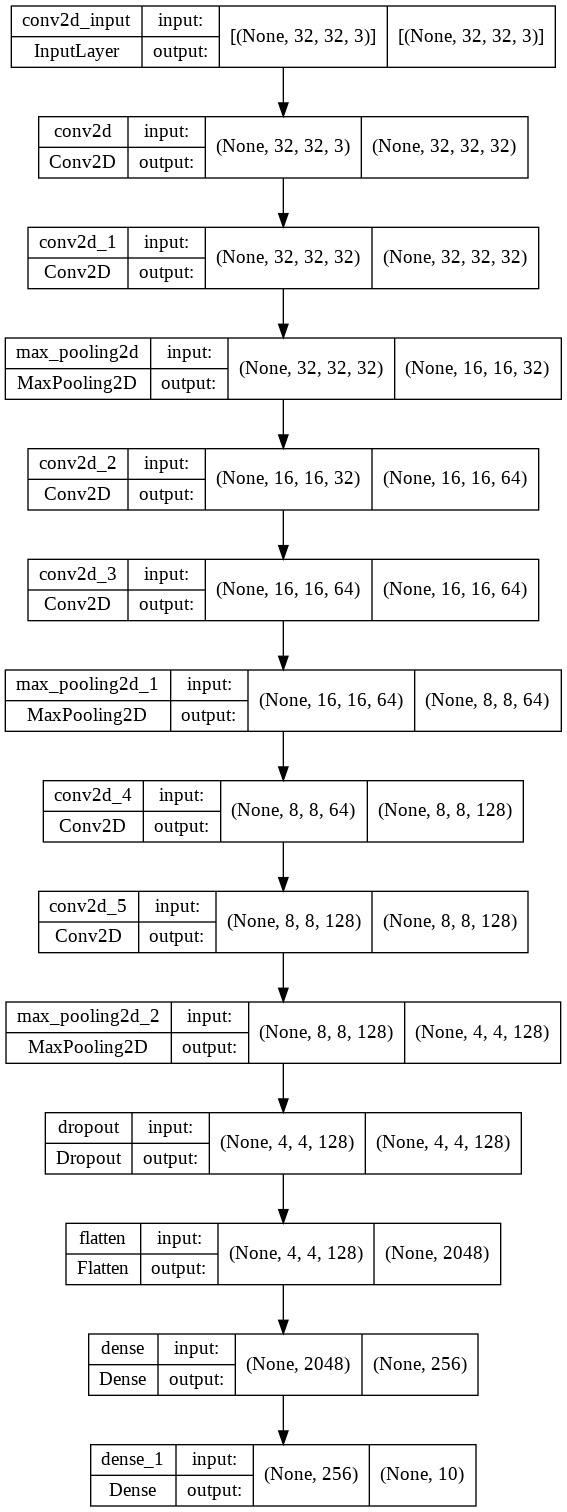

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model, './model.png', show_shapes =True)